In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [7]:
#E:\Pattern Recognition\DigitRecognizer\data


images = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/images.npy')
labels = np.load('/mnt/e/Pattern Recognition/DigitRecognizer/data/labels.npy')

In [10]:
pd.value_counts(pd.Series(labels))

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Correct label for this number is 5


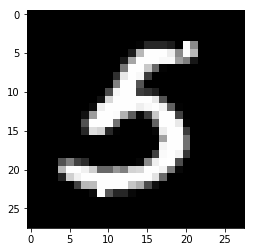

In [30]:
plt.imshow(images[679,:,:], cmap='gray')
print('Correct label for this number is {}'.format(labels[679]))

In [36]:
print(type(images))
print(np.amin(images))
print(np.amax(images))
print(images[679,:,:].dtype)

<class 'numpy.ndarray'>
0.0
255.0
float32
